## Домашнее задание № 4

### Ансамблевые методы 

**Дедлайн: 3.06.2020 0:30** 
Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

**Максимальный балл: 10**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [13]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
counter = data.isnull().sum()/data.shape[0]*100
print(counter)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


Пропущеных значений(NaN) нет ни в одной колонке

**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

In [15]:
for i in data:
    counter = len(data[data[i] == 0])/data.shape[0]*100
    print("Нулей в колонке ", i, ": ", counter,"%", sep = '')

Нулей в колонке Pregnancies: 14.453125%
Нулей в колонке Glucose: 0.6510416666666667%
Нулей в колонке BloodPressure: 4.557291666666666%
Нулей в колонке SkinThickness: 29.557291666666668%
Нулей в колонке Insulin: 48.69791666666667%
Нулей в колонке BMI: 1.4322916666666665%
Нулей в колонке DiabetesPedigreeFunction: 0.0%
Нулей в колонке Age: 0.0%
Нулей в колонке Outcome: 65.10416666666666%


* Нули в колонке Pregnancies иметься могут, так как существуют женщины не имеющие беременности  
* Нули в колонке Glucose не могут иметься, так как у живого человека количество глюкозы в крови всегда положительное количество (норма 590—1080 мг или 3,3—6,0 ммоль/л), таким образом 0 в колонке означает пропуск (*https://ru.wikipedia.org/wiki/Гликемия*)  
* Нули в колонке Insulin не могут иметься, так как у живого человека инсулин всегда положительный (норма 2,7 – 10,4 мкЕд/мл) , таким образом 0 в колонке означает пропуск (*https://yandex.ru/turbo?text=https%3A%2F%2Fhealth.yandex.ru%2Fprocedures%2Fanalysis%2Finsulin&utm_source=yandex&utm_medium=search&utm_campaign=yandex-searchster&utm_content=procedure&saas_webreqid=1590676579298959-1723135733592467775700244-production-app-host-vla-web-yp-75*)
* Нули в колонке BloodPressure не могут иметься, так как у живого человека кровянное давление всегда положительное (норма  120 и 80 мм рт. ст.) , таким образом 0 в колонке означает пропуск (*https://ru.wikipedia.org/wiki/Кровяное_давление#Физиология_измеряемых_параметров*)
* Нули в колонке SkinThickness не могут иметься, так как у живого человека кровянное давление всегда положительное(норма 0,5 - 5 мм), таким образом 0 в колонке означает пропуск (*https://ru.wikipedia.org/wiki/Кожа*)  
* Нули в колонке BMI не могут иметься так как масса тела человека всегда больше 0, таким образом 0 в колонке означает пропуск  
* Нули в колонке Outcome могут иметься так как существуют люди не болеющие диабетом  

In [0]:
for i in ['Glucose', 'SkinThickness', 'BloodPressure', 'Insulin']:
    data[i] = np.where(data[i] == 0, data[i][data[i] != 0].mean(), data[i])

In [17]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

In [0]:
o1 = data[data.Outcome == 1]
o2 = data[data.Outcome == 0]

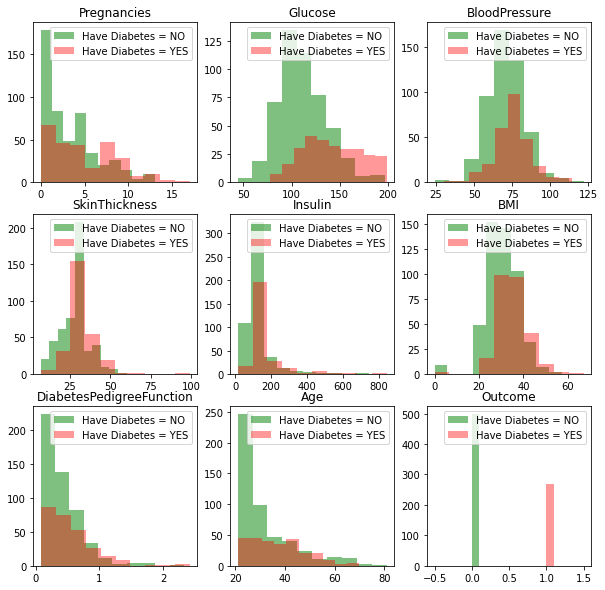

In [19]:
o1 = data[data.Outcome == 1]
o0 = data[data.Outcome == 0]
fig, ax = plt.subplots(3,3, figsize = (10, 10))
colum = np.reshape(np.array(data.columns), (3,3))
for i in range(3):
    for j in range(3):
        ax[i][j].hist(o0[colum[i][j]], label = 'Have Diabetes = NO', color = 'green', alpha = 0.5)
        ax[i][j].hist(o1[colum[i][j]], label = 'Have Diabetes = YES', color = 'red', alpha =0.4)
        ax[i][j].set_title(colum[i][j])
        ax[i][j].legend()

**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [0]:
names_coloumns = list(data.columns)
names_coloumns.pop()
X = data[names_coloumns].to_numpy()
y = data['Outcome'].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [23]:
def tip(y_test, y_pred):
    return 'Recall {}, \nPrecision {}, \nAccuracy_score {}'.format(round(recall_score(y_test, y_pred), 3), round(precision_score(y_test, y_pred), 3), round(accuracy_score(y_pred, y_test), 3))

bc = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=10)
bc.fit(X_train, Y_train)
pred_bc = bc.predict(X_test)

rfc = RandomForestClassifier(n_estimators=10, random_state = 1)
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)

print('BaggingClassifier:\n\n', tip(Y_test, pred_bc), '\n\nRandom Forest Classifier:\n\n', tip(Y_test, pred_rfc))

BaggingClassifier:

 Recall 0.712, 
Precision 0.618, 
Accuracy_score 0.792 

Random Forest Classifier:

 Recall 0.606, 
Precision 0.571, 
Accuracy_score 0.758


#### Вывод:  
В целом модели показывают в среднем одинаковые результаты, но в зависимости от случайности выбора модели метрики могут меняться

**4. (2 балл)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

In [0]:
from sklearn.metrics import roc_auc_score

In [0]:
n_estimators = list(map(int, np.linspace(10, 1500, 10)))
auc1 = []

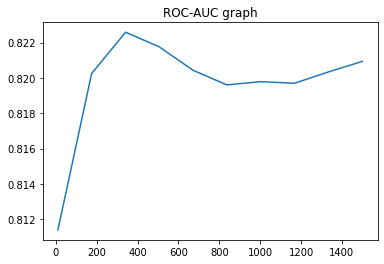

In [26]:
for i in n_estimators:
    auc1.append(roc_auc_score(Y_test, RandomForestClassifier(n_estimators = i, random_state = 1).fit(X_train, Y_train).predict_proba(X_test)[:,1]))

plt.plot(n_estimators, auc1)
plt.title('ROC-AUC graph')
plt.show()

In [0]:
auc2 = []
min_samples_leafs =  list(map(int, np.linspace(1, 100, 10)))

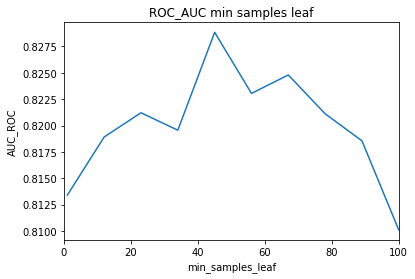

In [28]:
for i in min_samples_leafs: 
    auc2.append(roc_auc_score(Y_test, RandomForestClassifier(min_samples_leaf = i, random_state = 1, n_estimators = 20).fit(X_train, Y_train).predict_proba(X_test)[:,1]))

plt.plot(min_samples_leafs, auc2)
plt.title('ROC_AUC min samples leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC_ROC')
plt.xlim((0, 100))
plt.show()

Случайный лес значительно превосходит по точности одиночное дерево и достигая отсетки в 200 деревьев ROC AUC кривая в среднем достигает значения около 0.83 , ее рост прекращается


Также лучшее значение кривая достигает максимума в некотором случайном диапазаоне который можно отследить при фиксировании коэфмциентов в построеннии моделей, но в диапазоне от 50 до 100 зачастую метрики монотонно убывают

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

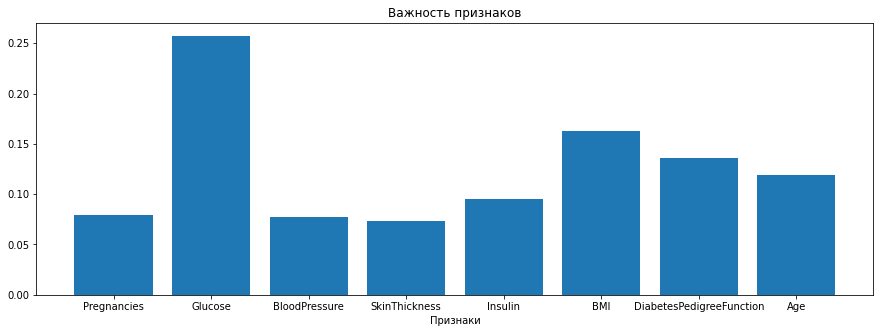

In [29]:
plt.figure(figsize=(15, 5))
plt.bar(names_coloumns, rfc.feature_importances_)
plt.title('Важность признаков')
plt.xlabel('Признаки')
plt.show()

**6. (2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [0]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier

In [31]:
hgbs = HistGradientBoostingClassifier().fit(X_train, Y_train).predict(X_test)
gbs = GradientBoostingClassifier(n_estimators = 50).fit(X_train, Y_train).predict(X_test)

print( 'Hist Gradient Boosting Classifier:\n\n', tip(Y_test, hgbs), '\n\nGradient Boosting Classifier: \n\n', tip(Y_test, gbs))

Hist Gradient Boosting Classifier:

 Recall 0.682, 
Precision 0.577, 
Accuracy_score 0.766 

Gradient Boosting Classifier: 

 Recall 0.682, 
Precision 0.608, 
Accuracy_score 0.784


Метрики имеют примерно одинаковое значение, большую роль по моему мнению играет случайность в построении моделей

**7. (1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [0]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [39]:
base_learners = [('str1', LinearSVC()), 
                 ('str2', RandomForestClassifier(n_estimators=200, random_state=1))]
stack = StackingClassifier(base_learners, final_estimator = LogisticRegression(random_state = 1)).fit(X_train, Y_train).predict(X_test)

print('Stacking Classifier', tip(Y_test, stack))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Stacking Classifier Recall 0.758, 
Precision 0.602, 
Accuracy_score 0.788


Качество для стэка моделей улучшилось это видно по значительному улучшению Recall и Accuracy, метрика Precision однако осталась неизменной

*tip: не забудьте завести список базовых алгоритмов*
<code>
base_learners = [
                 ('name1', model1(),
                 ('name2', model2())             
                ]

</code>